In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import axes3d, Axes3D
properati = pd.read_csv('datos/properati_2.csv',index_col=0,error_bad_lines=False)

In [ ]:
def function(x):
    if(x<1500):
        return 'green'
    if(x<2000):
        return 'pink'
    if(x<2500):
        return 'gray'
    if(x<3000):
        return 'red'
    if(x<3500):
        return 'blue'
    return 'black'
properati_CABA=properati[properati['place_name'].str.contains('Capital Federal') & properati['property_type'].str.contains('apartment')]
properati_CABA=properati_CABA[['lat-lon','price_usd_per_m2','surface_covered_in_m2']].dropna()
properati_CABA['lon']=properati_CABA['lat-lon'].str.split(",").str[0].str.replace("-34.","").astype(int)
properati_CABA['lat']=properati_CABA['lat-lon'].str.split(",").str[1].str.replace("-58.","").astype(int)
properati_CABA['price_usd_per_m2']=properati_CABA['price_usd_per_m2'].astype(int)
properati_CABA['surface_covered_in_m2']=properati_CABA['surface_covered_in_m2'].astype(int)
properati_CABA['color']=properati_CABA['price_usd_per_m2'].apply(function)

In [ ]:

threedee = plt.figure().gca(projection='3d')
threedee.scatter(properati_CABA['lat'], properati_CABA['lon'], properati_CABA['surface_covered_in_m2'],c=properati_CABA['color'],marker='^')
plt.show()

# Ejemplo trivial KNN con cross validation (CV)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
#preparo set de datos
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3])
neigh = KNeighborsRegressor(n_neighbors=2,n_jobs=-1)

#preparo lista de scores
scores = []

#spliteo en set de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.4 ) # al asignarle random_state devuelve siempre lo mismo 
#entreno el set y veo el puntaje que tiene sobre el test
reg=neigh.fit(X_train, y_train)
print (X_test)
prediccion=reg.predict(X_test)
print (prediccion)
print (reg.score(X_test,prediccion))


[[-1. -1.]
 [ 2.  2.]
 [-1. -1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 1.  1.]
 [-1. -1.]]
[ 1.  3.  1.  0.  0.  1.  1.]
1.0


## CV varias veces en ejemplo anterior

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
#preparo set de datos
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3])
neigh = KNeighborsRegressor(n_neighbors=2,n_jobs=-1)

#preparo lista de scores
scores = []

for i in range(0,10): # lo pruebo varias veces
    #spliteo en set de entrenamiento y de prueba
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4 ) # al asignarle random_state devuelve siempre lo mismo 
    #entreno el set y veo el puntaje que tiene sobre el test
    reg=neigh.fit(X_train, y_train)
    prediccion=reg.predict(X_test)
    scores.append(reg.score(X_test,prediccion))
print(scores) 
print(np.mean(scores))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0


# Plot de los diferentes puntajes segun K

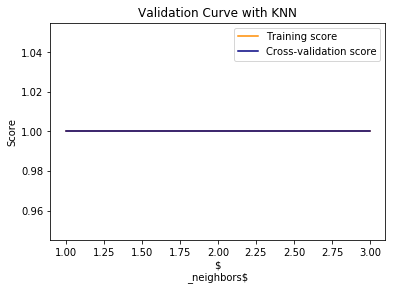

In [6]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

#preparo set de datos
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3])
neigh = KNeighborsRegressor(n_neighbors=2,n_jobs=-1)

param_range=(1,3)
train_scores, test_scores = validation_curve(
KNeighborsRegressor(), X, y, param_name="n_neighbors",param_range=param_range,
cv=4, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("$\n_neighbors$")
plt.ylabel("Score")

plt.plot(param_range, train_scores_mean, label="Training score",
color="darkorange")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
color="navy")

plt.legend(loc="best")
plt.show()

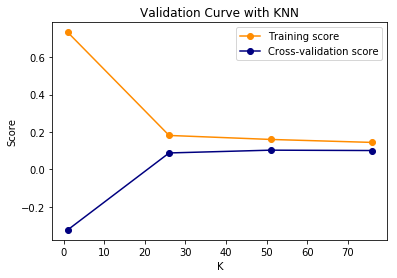

In [20]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

#preparo set de datos
X = zip(properati['surface_total_in_m2'],properati['price_usd_per_m2'])
y = properati['price']
#Pone numeros en nans
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X=imp.transform(X)

neigh = KNeighborsRegressor(n_neighbors=2,n_jobs=-1)


param_range=list(range(1,101,25))
train_scores, test_scores = validation_curve(
KNeighborsRegressor(), X, y, param_name="n_neighbors",param_range=param_range,
cv=2, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("K")
plt.ylabel("Score")

plt.plot(param_range, train_scores_mean, label="Training score",
color="darkorange",marker="o")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
color="navy",marker="o")

plt.legend(loc="best")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.model_selection import learning_curve
#preparo set de datos
X = zip(properati['surface_total_in_m2'],properati['price_usd_per_m2'])
y = properati['price']
#Pone numeros en nans
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X=imp.transform(X)

neigh = KNeighborsRegressor(n_neighbors=10,n_jobs=-1)

param_range=(10,20)
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsRegressor(), X, y, cv=2)

plt.title("Learning Curve with KNN")
plt.xlabel("train_sizes")
plt.ylabel("Score")

plt.plot(train_sizes, train_scores, label="Training score",
color="darkorange",marker="o")
plt.plot(train_sizes, valid_scores, label="Cross-validation score",
color="navy",marker="o")

plt.legend(loc="best")
plt.show()


# =======================================================

# IMPLEMENTACIÓN KNN


In [3]:
properati_reduce=properati
properati_reduce=properati_reduce.dropna().reset_index()

In [4]:
training_samples=[]
test_samples=[]
k=10
test_samples_index=[100,150,200,350,400,450,460,461,462] #Indices de los elementos de prueba en el df
for index, row in properati_reduce.iterrows():
    if (index not in test_samples_index): #Uso para entrenar todos los indices, menos los de prueba.
        training_samples.append([row['surface_total_in_m2'],row['floor'],row['rooms'],row['lat'],row['lon'],row['distancia_subte'],row['distancia_universidad']])
    else:
        test_samples.append([row['surface_total_in_m2'],row['floor'],row['rooms'],row['lat'],row['lon'],row['distancia_subte'],row['distancia_universidad']])
        training_samples.append([0,0,0,0,0,0,0])


In [5]:
nbrs=NearestNeighbors(n_neighbors=k,algorithm ='kd_tree').fit(training_samples)

In [6]:
distances,indices=nbrs.kneighbors(test_samples) # Le paso las caracteristicas de los test de prueba para aplicar KNN

In [7]:
i=0
for index in test_samples_index:
    mean=[]
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Original : ",properati_reduce[index:index+1]['price_usd_per_m2'].iloc[0])
    for j in range(k):
        print("|","Neighbor",j,": ",properati_reduce[indices[i][j]:indices[i][j]+1]['price_usd_per_m2'].iloc[0])
        mean.append(properati_reduce[indices[i][j]:indices[i][j]+1]['price_usd_per_m2'].iloc[0])
    print("Mean: ",sum(mean)//len(mean))
    i+=1

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original :  2222.0
| Neighbor 0 :  2500.0
| Neighbor 1 :  3076.0
| Neighbor 2 :  3000.0
| Neighbor 3 :  3010.0
| Neighbor 4 :  3805.0
| Neighbor 5 :  3074.0
| Neighbor 6 :  2027.0
| Neighbor 7 :  2742.0
| Neighbor 8 :  2959.0
| Neighbor 9 :  3000.0
Mean:  2919.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original :  1744.0
| Neighbor 0 :  1744.0
| Neighbor 1 :  1744.0
| Neighbor 2 :  1790.0
| Neighbor 3 :  1744.0
| Neighbor 4 :  1790.0
| Neighbor 5 :  1744.0
| Neighbor 6 :  1744.0
| Neighbor 7 :  1790.0
| Neighbor 8 :  2044.0
| Neighbor 9 :  2162.0
Mean:  1829.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original :  2444.0
| Neighbor 0 :  2862.0
| Neighbor 1 :  1938.0
| Neighbor 2 :  2275.0
| Neighbor 3 :  2345.0
| Neighbor 4 :  3475.0
| Neighbor 5 :  1641.0
| Neighbor 6 :  3795.0
| Neighbor 7 :  1987.0
| Neighbor 8 :  3062.0
| Neighbor 9 :  1569.0
Mean:  2494.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original :  2322.0
| Neighbor 0 :  2322.0
| Neighbor 1 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
#preparo set de datos
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 2, 1,2, 1,2, 1,2, 1,2, 1])
neigh = KNeighborsRegressor(n_neighbors=2,n_jobs=-1)

#preparo lista de scores
scores = []

for i in range(0,10): # lo pruebo varias veces
    #spliteo en set de entrenamiento y de prueba
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4 ) # al asignarle random_state devuelve siempre lo mismo 
    #entreno el set y veo el puntaje que tiene sobre el test
    clf=neigh.fit(X_train, y_train)
    scores.append(clf.score(X_test,y_test))
print(scores) #no estoy seguro como funciona esto
print(np.mean(scores))

[0.10714285714285721, -0.42857142857142838, -0.42857142857142838, 0.37500000000000006, -4.0, -2.7499999999999987, 0.16666666666666663, -0.42857142857142838, -0.42857142857142838, 0.16666666666666663]
-0.764880952381
